**MSc Computational Physics AUTh**<br>
**Academic Year: 2024-2025**<br>
**Master's Thesis**<br>

**Thesis Title:**<br>  
# **"Reconstruction of the EoSs of Exotic Stars using ML and ANNs regression models"**

**Implemented by: Ioannis Stergakis**<br>
**AEM: 4439**<br>

**Jupyter Notebook: JN3**<br>
**Name: "testing_regress_ML_sl.ipynb"**<br>

**Description:**<br> 
**1. Training and testing Machine Learning algorithms for regression purposes**<br>
**2. Assessing the accuracy of those algorithms using various metrics**


**Abbrevations:**<br>
**1. NS -> Neutron Star**<br>
**1. QS -> Quark Star**<br>

## **1. Importing and pre-processing data**

In [1]:
# Numpy module import
import numpy as np

# The plotting module matplotlib
import matplotlib.pyplot as plt

# Module for data importation and presentaion
import pandas as pd
from pandas import DataFrame

# Module for detecting and imputing missing data
import missingno as msno

# ML package for splitting the dataframe into train and test set
from sklearn.model_selection import train_test_split

# ML package for data scalling
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importing the NS EOS data
df_NS_EOS=pd.read_csv("NS_reg_data_s100.csv",header=0)
df_QS_EOS=pd.read_csv("QS_reg_data_s100.csv",header=0)


# Showing the data
display(df_NS_EOS)
display(df_QS_EOS)

,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800),E_c(10),E_c(50),E_c(100),E_c(200),...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.753574,5.201326,5.005939,4.745018,5.516383,5.673930,5.226697,5.228142,5.349768,5.544603
1,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.347856,5.708800,5.504252,5.749450,5.847573,5.253151,5.502099,4.904455,4.842121,6.244266
2,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.778406,5.112040,5.903120,4.785401,6.164629,4.793833,5.621854,5.382842,6.248591,6.523238
3,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,5.319544,5.963362,6.069765,6.307773,5.304597,5.883870,5.609749,5.271895,5.286438,6.275376
4,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301,864.635734,1304.614162,1564.969658,1888.099482,...,6.316146,5.201160,5.178831,5.592731,5.716380,5.618333,5.220385,5.109423,5.654206,5.374555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30395,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,14.075877,14.252338,13.513203,13.297990,14.016192,15.125043,14.000791,10.583277,12.872427,11.918547
30396,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,13.757765,12.868918,13.843855,14.511371,14.320687,13.021047,14.242380,11.436195,11.578946,11.116674
30397,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,12.976988,13.521614,13.603322,13.717729,14.727811,13.800575,14.189480,11.893311,11.038610,11.710286
30398,5.403388,1.849633,1.234931,1.000000,1.000000,1.000000,206.135510,319.926654,393.972268,499.111054,...,13.202122,13.148827,13.647112,13.870894,14.292080,14.119637,13.536594,11.515037,11.894190,11.395147


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800),E_c(10),E_c(50),E_c(100),E_c(200),...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,8.959457,11.593229,9.949707,9.798504,11.455198,11.904947,11.166535,10.360262,9.755393,8.570276
1,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.145178,10.002327,10.165674,10.128378,10.965964,11.207054,10.522203,10.651441,10.042306,9.033370
2,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.071756,10.887648,10.392673,9.414304,11.013888,11.200908,11.262729,9.495874,10.924364,9.373154
3,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.207095,9.561412,9.798905,9.385573,11.528692,10.308981,11.667502,9.857490,9.562289,9.145917
4,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694,268.386875,387.975469,537.556395,836.882428,...,9.246473,10.521009,9.987907,10.562971,11.685060,11.004861,11.205870,10.217271,10.568746,9.229139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,5.794135,6.950967,7.893483,6.858629,7.959357,7.408271,7.237478,7.994082,7.288438,7.740238
50996,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,6.446645,6.416716,7.129269,7.018295,7.448407,7.250506,8.161290,7.457228,7.495652,8.300280
50997,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,5.230943,6.526717,7.581066,6.843901,7.290284,7.577865,7.073089,7.289872,7.465370,7.966188
50998,1.807085,1.862141,1.921313,2.016364,2.149296,2.306338,641.442289,714.852823,809.478679,1006.581593,...,5.798161,6.962729,7.607580,7.389814,7.936254,7.647956,7.481916,7.058072,7.358002,7.308888


In [3]:
# Getting the first 6 columns and all rows (regression output columns)
NS_EOS_regY = df_NS_EOS.iloc[:,0:6]
QS_EOS_regY = df_QS_EOS.iloc[:,0:6]
# Getting the rest column and all rows (all explanatory variables columns)
NS_EOS_regX = df_NS_EOS.iloc[:,12:]
QS_EOS_regX = df_QS_EOS.iloc[:,12:]

In [4]:
# Showing the head of the X vector table of values
NS_EOS_regX.head()

,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,0.409994,0.400979,0.304677,0.475179,0.326941,0.343041,0.839699,0.389780,0.628067,0.566439,...,5.753574,5.201326,5.005939,4.745018,5.516383,5.673930,5.226697,5.228142,5.349768,5.544603
1,0.212808,0.223173,0.258963,0.428439,0.440610,0.417531,0.520423,0.529855,0.681713,0.605906,...,5.347856,5.708800,5.504252,5.749450,5.847573,5.253151,5.502099,4.904455,4.842121,6.244266
2,0.303692,0.424015,0.356126,0.486326,0.411779,0.481431,0.531765,0.536935,0.475472,0.845495,...,5.778406,5.112040,5.903120,4.785401,6.164629,4.793833,5.621854,5.382842,6.248591,6.523238
3,0.343276,0.287816,0.207954,0.287159,0.553131,0.395827,0.570124,0.714203,0.387177,0.893604,...,5.319544,5.963362,6.069765,6.307773,5.304597,5.883870,5.609749,5.271895,5.286438,6.275376
4,0.168321,0.569217,0.247429,0.478765,0.460125,0.552871,0.709566,0.325587,0.560728,0.671290,...,6.316146,5.201160,5.178831,5.592731,5.716380,5.618333,5.220385,5.109423,5.654206,5.374555


In [5]:
# Showing the head of the X vector table of values
QS_EOS_regX.head()

,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,...,R_6,R_7,R_8,R_9,R_10,R_11,R_12,R_13,R_14,R_15
0,0.292028,0.692718,0.304095,0.815969,0.572874,0.888877,1.163570,1.035494,0.962414,1.688320,...,8.959457,11.593229,9.949707,9.798504,11.455198,11.904947,11.166535,10.360262,9.755393,8.570276
1,0.301488,0.554567,0.260817,0.881757,0.502825,0.973429,1.188240,0.851487,1.175474,1.622734,...,9.145178,10.002327,10.165674,10.128378,10.965964,11.207054,10.522203,10.651441,10.042306,9.033370
2,0.373002,0.330130,0.422954,0.869509,0.388347,0.766375,1.024913,1.139727,1.030898,1.460734,...,9.071756,10.887648,10.392673,9.414304,11.013888,11.200908,11.262729,9.495874,10.924364,9.373154
3,0.431373,0.324176,0.275265,0.725748,0.591206,0.979374,1.112319,0.999412,0.993123,1.672784,...,9.207095,9.561412,9.798905,9.385573,11.528692,10.308981,11.667502,9.857490,9.562289,9.145917
4,0.622437,0.631083,0.136402,0.830874,0.513875,0.811358,1.220414,1.129613,0.949157,1.598523,...,9.246473,10.521009,9.987907,10.562971,11.685060,11.004861,11.205870,10.217271,10.568746,9.229139


In [6]:
# Showing the head of the Y vector table of values
NS_EOS_regY.head()

,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
0,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301
1,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301
2,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301
3,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301
4,21.865893,6.773071,4.162424,2.610124,1.687121,1.138301


In [7]:
# Showing the head of the Y vector table of values
QS_EOS_regY.head()

,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
0,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694
1,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694
2,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694
3,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694
4,2.988411,2.990755,2.992334,2.993987,2.995479,2.996694


In [8]:
# Splitting the data into test and training sets
# test_size = 0.25, the percentage of the test size to the complete dataset (here we choose 25%)
# random_state is the seed. A specific pseudorandom number to split the data set
# in order to produce same splitting every time we run the script.

# Splitting the all explanatory quantities data set
NS_EOS_regX_train, NS_EOS_regX_test, NS_EOS_regY_train, NS_EOS_regY_test = train_test_split(NS_EOS_regX, NS_EOS_regY, test_size = 0.25, random_state = 45)
QS_EOS_regX_train, QS_EOS_regX_test, QS_EOS_regY_train, QS_EOS_regY_test = train_test_split(QS_EOS_regX, QS_EOS_regY, test_size = 0.25, random_state = 45)

In [9]:
 # Definition of scaler
# scaler = MinMaxScaler()

# # Applying feature scaling on all explanatory quantities train and test sets
# NS_EOS_regX_train_scaled = scaler.fit_transform(NS_EOS_regX_train)
# #NS_EOS_regY_train_scaled = scaler.fit_transform(NS_EOS_regY_train)
# NS_EOS_regX_test_scaled =scaler.transform(NS_EOS_regX_test)
# #NS_EOS_regY_test_scaled =scaler.transform(NS_EOS_regY_test)

In [10]:
# NS_EOS_regX_train_scaled

In [11]:
# NS_EOS_regX_test_scaled

## **2. Testing ML regression algorithms**

In [12]:
from sklearn.metrics import mean_squared_log_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

**Decision Tree**

In [13]:
# Multiple output Decision tree regressor Neutron Star
regr_multidtree_NS = DecisionTreeRegressor(max_depth=10000,criterion="squared_error")
regr_multidtree_NS.fit(NS_EOS_regX_train,NS_EOS_regY_train)

DecisionTreeRegressor(max_depth=10000)

In [14]:
# Multiple output Decision tree regressor Quark Star
regr_multidtree_QS = DecisionTreeRegressor(max_depth=10000,criterion="squared_error")
regr_multidtree_QS.fit(QS_EOS_regX_train,QS_EOS_regY_train)

DecisionTreeRegressor(max_depth=10000)

In [15]:
NS_EOS_regY_predict_dtree = regr_multidtree_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_dtree)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 7.98916512,  2.06262644,  2.75299846,  2.2395571 ,  1.87649923,
         1.61977855],
       [15.01947036,  6.48353748,  4.26939242,  2.87456842,  1.99588437,
         1.4423481 ],
       [10.34967531,  4.75573257,  4.79679087,  3.68473657,  2.89839544,
         2.34236829],
       ...,
       [15.30389981,  3.74052314,  3.1540342 ,  2.17193678,  1.55325417,
         1.16350855],
       [14.74296008,  2.8980597 ,  1.85832876,  2.62575643,  2.14958339,
         1.81287821],
       [ 9.4138626 ,  2.5843434 ,  1.67179193,  1.12918557,  1.        ,
         1.        ]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
27403,5.403388,4.545059,1.536909,1.048984,1.000000,1.000000
1297,15.303900,6.540859,4.305503,2.897317,2.010215,1.451376
7285,17.239177,8.262381,3.747775,2.545970,1.788880,1.311944
10961,7.164585,3.012388,1.926309,1.280522,1.976758,1.690672
16286,7.801890,5.606897,2.817799,1.960122,1.419819,1.079450
...,...,...,...,...,...,...
22529,7.989165,5.697447,2.860175,1.986817,1.436636,1.090044
18187,14.742960,7.146039,3.260298,2.238879,1.595425,1.190075
4904,12.994164,4.772944,2.387499,1.554748,1.059591,1.000000
19303,9.413863,5.644936,2.118977,1.395083,1.000000,1.000000


In [16]:
QS_EOS_regY_predict_dtree = regr_multidtree_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_dtree)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[2.39926693, 2.47378162, 2.53684612, 2.61545827, 2.69799765,
        2.77277188],
       [1.48344457, 1.6307158 , 1.76585201, 1.94762398, 2.15355153,
        2.3519718 ],
       [1.75172966, 1.81440645, 1.88090573, 1.98601551, 2.12989224,
        2.29593872],
       ...,
       [1.42814666, 1.56742897, 1.69858245, 1.87968625, 2.09067872,
        2.29894285],
       [2.8219194 , 2.85296434, 2.87563612, 2.90072213, 2.92442165,
        2.94429656],
       [2.09297387, 2.16556624, 2.23574241, 2.33536679, 2.45504167,
        2.57644328]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
4484,2.882622,2.904106,2.919406,2.936030,2.951504,2.964351
3943,1.483445,1.630716,1.765852,1.947624,2.153552,2.351972
46761,1.751730,1.814406,1.880906,1.986016,2.129892,2.295939
5042,2.380726,2.486087,2.563972,2.650929,2.733695,2.803462
49298,1.849498,1.907617,1.969221,2.066476,2.199393,2.352532
...,...,...,...,...,...,...
32199,2.216694,2.290385,2.358630,2.451277,2.557261,2.660233
1778,1.521968,1.682923,1.825452,2.010657,2.213170,2.402643
4038,1.428147,1.567429,1.698582,1.879686,2.090679,2.298943
17495,2.551156,2.613025,2.663291,2.723770,2.785212,2.839495


In [17]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_dtree_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="raw_values")
MSLE_dtree_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="uniform_average")
MSE_dtree_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="raw_values")
MSE_dtree_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_dtree,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_dtree_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_dtree_NS_avg)
print("Mean squared error (raw values):")
print(MSE_dtree_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_dtree_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.0715679  0.06051277 0.02194209 0.01818101 0.02405581 0.02413937]
Mean squared log error (uniform average):
0.03673315705484498
Mean squared error (raw values):
[33.02238894  3.64653548  0.37084268  0.17050433  0.20793538  0.23595451]
Mean squared error (uniform average):
6.275693551478344


In [18]:
print("QUARK STARS results:\n")
MSLE_dtree_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="raw_values")
MSLE_dtree_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="uniform_average")
MSE_dtree_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="raw_values")
MSE_dtree_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_dtree,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_dtree_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_dtree_QS_avg)
print("Mean squared error (raw values):")
print(MSE_dtree_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_dtree_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00866582 0.00773764 0.00676119 0.00534715 0.00372964 0.00229748]
Mean squared log error (uniform average):
0.005756489979896678
Mean squared error (raw values):
[0.09025936 0.08311057 0.07487796 0.06192296 0.04565886 0.02981616]
Mean squared error (uniform average):
0.06427431281577949


**Gradient Boosting**

In [19]:
# Multiple output Gradient Boosting regressor Neutron Star
regr_multigradboost_NS = MultiOutputRegressor(GradientBoostingRegressor(loss="squared_error",n_estimators=100,criterion="squared_error"))
regr_multigradboost_NS.fit(NS_EOS_regX_train,NS_EOS_regY_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(criterion='squared_error'))

In [20]:
# Multiple output Gradient Boosting regressor Quark Star
regr_multigradboost_QS = MultiOutputRegressor(GradientBoostingRegressor(loss="squared_error",n_estimators=100,criterion="squared_error"))
regr_multigradboost_QS.fit(QS_EOS_regX_train,QS_EOS_regY_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(criterion='squared_error'))

In [21]:
NS_EOS_regY_predict_gradboost = regr_multigradboost_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_gradboost)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 6.12761318,  3.17415484,  2.59191505,  1.63147878,  1.15635857,
         1.22399605],
       [16.74531292,  6.05929957,  4.31118465,  2.91450551,  1.96717344,
         1.41179333],
       [14.73845465,  5.81323781,  4.01882383,  2.99284694,  2.07399818,
         1.54098152],
       ...,
       [14.70187703,  6.06683537,  2.61368033,  1.8662952 ,  1.3807141 ,
         1.08995959],
       [10.25200515,  6.23269541,  2.45391526,  1.65881243,  1.2103139 ,
         1.02998318],
       [ 7.45635835,  2.8204429 ,  2.72459954,  1.75716684,  1.47011981,
         1.13032451]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
27403,5.403388,4.545059,1.536909,1.048984,1.000000,1.000000
1297,15.303900,6.540859,4.305503,2.897317,2.010215,1.451376
7285,17.239177,8.262381,3.747775,2.545970,1.788880,1.311944
10961,7.164585,3.012388,1.926309,1.280522,1.976758,1.690672
16286,7.801890,5.606897,2.817799,1.960122,1.419819,1.079450
...,...,...,...,...,...,...
22529,7.989165,5.697447,2.860175,1.986817,1.436636,1.090044
18187,14.742960,7.146039,3.260298,2.238879,1.595425,1.190075
4904,12.994164,4.772944,2.387499,1.554748,1.059591,1.000000
19303,9.413863,5.644936,2.118977,1.395083,1.000000,1.000000


In [22]:
QS_EOS_regY_predict_gradboost = regr_multigradboost_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_gradboost)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[2.54615302, 2.54150944, 2.59474992, 2.62943779, 2.72679869,
        2.8018188 ],
       [1.51355149, 1.62267971, 1.77472384, 1.94580965, 2.14403027,
        2.35342232],
       [1.95690309, 2.01704596, 2.11264267, 2.20119458, 2.33269567,
        2.48494808],
       ...,
       [1.46703845, 1.58019014, 1.7097681 , 1.87910568, 2.09206083,
        2.29192687],
       [2.50568447, 2.54082281, 2.60833379, 2.64235422, 2.69246161,
        2.7880847 ],
       [2.53492403, 2.53563618, 2.59327327, 2.65434998, 2.71610773,
        2.76225439]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
4484,2.882622,2.904106,2.919406,2.936030,2.951504,2.964351
3943,1.483445,1.630716,1.765852,1.947624,2.153552,2.351972
46761,1.751730,1.814406,1.880906,1.986016,2.129892,2.295939
5042,2.380726,2.486087,2.563972,2.650929,2.733695,2.803462
49298,1.849498,1.907617,1.969221,2.066476,2.199393,2.352532
...,...,...,...,...,...,...
32199,2.216694,2.290385,2.358630,2.451277,2.557261,2.660233
1778,1.521968,1.682923,1.825452,2.010657,2.213170,2.402643
4038,1.428147,1.567429,1.698582,1.879686,2.090679,2.298943
17495,2.551156,2.613025,2.663291,2.723770,2.785212,2.839495


In [23]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_gradboost_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSLE_gradboost_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="uniform_average")
MSE_gradboost_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSE_gradboost_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_gradboost,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_gradboost_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_gradboost_NS_avg)
print("Mean squared error (raw values):")
print(MSE_gradboost_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_gradboost_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.0525391  0.04392764 0.01245815 0.00902574 0.01230031 0.01288285]
Mean squared log error (uniform average):
0.02385563468673305
Mean squared error (raw values):
[20.44149378  2.34751779  0.21524451  0.080467    0.11111382  0.13283543]
Mean squared error (uniform average):
3.888112053918007


In [24]:
print("QUARK STARS results:\n")
MSLE_gradboost_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSLE_gradboost_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="uniform_average")
MSE_gradboost_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="raw_values")
MSE_gradboost_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_gradboost,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_gradboost_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_gradboost_QS_avg)
print("Mean squared error (raw values):")
print(MSE_gradboost_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_gradboost_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00460749 0.00414527 0.00361704 0.00288042 0.0020031  0.00122205]
Mean squared log error (uniform average):
0.0030792277862177284
Mean squared error (raw values):
[0.04708501 0.04378191 0.03950209 0.03296353 0.02431251 0.01576821]
Mean squared error (uniform average):
0.03390220872313986


**SVR**

In [25]:
# Multiple output SVR regresssor Neutron Star
regr_multiSVR_NS = MultiOutputRegressor(SVR(kernel="rbf", C=1.0, epsilon=0.1))
regr_multiSVR_NS.fit(NS_EOS_regX_train,NS_EOS_regY_train)

MultiOutputRegressor(estimator=SVR())

In [26]:
# Multiple output SVR regresssor Quark Star
regr_multiSVR_QS = MultiOutputRegressor(SVR(kernel="rbf", C=1.0, epsilon=0.1))
regr_multiSVR_QS.fit(QS_EOS_regX_train,QS_EOS_regY_train)

MultiOutputRegressor(estimator=SVR())

In [27]:
NS_EOS_regY_predict_SVR = regr_multiSVR_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_SVR)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 5.80953307,  2.69603999,  2.106089  ,  1.46888805,  1.15672438,
         1.11832464],
       [18.3775607 ,  6.06188538,  4.25986025,  2.95748735,  2.07201349,
         1.45716259],
       [14.24809261,  4.64703616,  3.59373082,  2.64060462,  1.97669562,
         1.50817058],
       ...,
       [10.97258587,  4.37049952,  2.7687819 ,  1.87758671,  1.33134158,
         1.09172207],
       [ 9.09941655,  4.30180735,  2.37346598,  1.66354937,  1.24307529,
         1.09445379],
       [ 7.99300715,  2.71290044,  2.58105895,  1.82708368,  1.42755316,
         1.2368217 ]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
27403,5.403388,4.545059,1.536909,1.048984,1.000000,1.000000
1297,15.303900,6.540859,4.305503,2.897317,2.010215,1.451376
7285,17.239177,8.262381,3.747775,2.545970,1.788880,1.311944
10961,7.164585,3.012388,1.926309,1.280522,1.976758,1.690672
16286,7.801890,5.606897,2.817799,1.960122,1.419819,1.079450
...,...,...,...,...,...,...
22529,7.989165,5.697447,2.860175,1.986817,1.436636,1.090044
18187,14.742960,7.146039,3.260298,2.238879,1.595425,1.190075
4904,12.994164,4.772944,2.387499,1.554748,1.059591,1.000000
19303,9.413863,5.644936,2.118977,1.395083,1.000000,1.000000


In [28]:
QS_EOS_regY_predict_SVR = regr_multiSVR_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_SVR)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[2.60712067, 2.67497769, 2.72064359, 2.77438471, 2.83256824,
        2.87680419],
       [1.55038765, 1.69643277, 1.82490953, 2.00441294, 2.20100409,
        2.38711143],
       [1.84284328, 1.91616755, 1.9892238 , 2.10005252, 2.24833969,
        2.40635597],
       ...,
       [1.46845866, 1.61799349, 1.74854707, 1.93269146, 2.14099947,
        2.34006933],
       [2.44186867, 2.50438983, 2.55721586, 2.62194586, 2.69553694,
        2.76437178],
       [2.63888554, 2.6797367 , 2.71778635, 2.76403517, 2.81351776,
        2.85511247]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
4484,2.882622,2.904106,2.919406,2.936030,2.951504,2.964351
3943,1.483445,1.630716,1.765852,1.947624,2.153552,2.351972
46761,1.751730,1.814406,1.880906,1.986016,2.129892,2.295939
5042,2.380726,2.486087,2.563972,2.650929,2.733695,2.803462
49298,1.849498,1.907617,1.969221,2.066476,2.199393,2.352532
...,...,...,...,...,...,...
32199,2.216694,2.290385,2.358630,2.451277,2.557261,2.660233
1778,1.521968,1.682923,1.825452,2.010657,2.213170,2.402643
4038,1.428147,1.567429,1.698582,1.879686,2.090679,2.298943
17495,2.551156,2.613025,2.663291,2.723770,2.785212,2.839495


In [29]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_SVR_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="raw_values")
MSLE_SVR_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="uniform_average")
MSE_SVR_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="raw_values")
MSE_SVR_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_SVR,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_SVR_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_SVR_NS_avg)
print("Mean squared error (raw values):")
print(MSE_SVR_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_SVR_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.07137286 0.06250312 0.01763109 0.01099039 0.01638314 0.02105261]
Mean squared log error (uniform average):
0.03332220159536047
Mean squared error (raw values):
[39.6574099   4.36692782  0.33900594  0.10504216  0.15858862  0.2274877 ]
Mean squared error (uniform average):
7.475743693415484


In [30]:
print("QUARK STARS results:\n")
MSLE_SVR_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="raw_values")
MSLE_SVR_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="uniform_average")
MSE_SVR_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="raw_values")
MSE_SVR_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_SVR,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_SVR_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_SVR_QS_avg)
print("Mean squared error (raw values):")
print(MSE_SVR_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_SVR_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00389825 0.00343368 0.00297147 0.00232663 0.00161194 0.00098851]
Mean squared log error (uniform average):
0.002538413490498306
Mean squared error (raw values):
[0.03986562 0.03622979 0.03238604 0.02658552 0.01953052 0.01273402]
Mean squared error (uniform average):
0.027888584551688505


**Random Forest**

In [31]:
# Random Forest regressor Neutron Star
max_depth = 3000
regr_rf_NS = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
regr_rf_NS.fit(NS_EOS_regX_train, NS_EOS_regY_train)

RandomForestRegressor(max_depth=3000, random_state=0)

In [32]:
# Random Forest regressor Quark Star
max_depth = 3000
regr_rf_QS = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
regr_rf_QS.fit(QS_EOS_regX_train, QS_EOS_regY_train)

RandomForestRegressor(max_depth=3000, random_state=0)

In [33]:
NS_EOS_regY_predict_RF = regr_rf_NS.predict(NS_EOS_regX_test)
print("Predicted values:")
display(NS_EOS_regY_predict_RF)
print("True values:")
display(NS_EOS_regY_test)

Predicted values:


array([[ 5.55853439,  3.71667365,  2.40945855,  1.57266477,  1.15225322,
         1.08592202],
       [16.15633693,  6.43557851,  4.25455516,  2.86519214,  1.99028622,
         1.44183119],
       [18.15353053,  5.81023091,  3.46369255,  2.55076675,  1.91592166,
         1.52927543],
       ...,
       [13.66782204,  5.41829243,  2.64657661,  1.92380347,  1.37241735,
         1.15872846],
       [ 9.26612125,  5.88806681,  2.33048362,  1.60699334,  1.16763704,
         1.07436815],
       [ 7.16521933,  2.47120884,  3.12686874,  1.70685371,  1.33781417,
         1.09569483]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
27403,5.403388,4.545059,1.536909,1.048984,1.000000,1.000000
1297,15.303900,6.540859,4.305503,2.897317,2.010215,1.451376
7285,17.239177,8.262381,3.747775,2.545970,1.788880,1.311944
10961,7.164585,3.012388,1.926309,1.280522,1.976758,1.690672
16286,7.801890,5.606897,2.817799,1.960122,1.419819,1.079450
...,...,...,...,...,...,...
22529,7.989165,5.697447,2.860175,1.986817,1.436636,1.090044
18187,14.742960,7.146039,3.260298,2.238879,1.595425,1.190075
4904,12.994164,4.772944,2.387499,1.554748,1.059591,1.000000
19303,9.413863,5.644936,2.118977,1.395083,1.000000,1.000000


In [34]:
QS_EOS_regY_predict_RF = regr_rf_QS.predict(QS_EOS_regX_test)
print("Predicted values:")
display(QS_EOS_regY_predict_RF)
print("True values:")
display(QS_EOS_regY_test)

Predicted values:


array([[2.59295383, 2.6389431 , 2.67807281, 2.72797114, 2.78236792,
        2.83373391],
       [1.48148249, 1.62799574, 1.76265169, 1.94409564, 2.15006884,
        2.3489093 ],
       [2.00826468, 2.07156259, 2.13522987, 2.23022505, 2.35201987,
        2.48434721],
       ...,
       [1.4295631 , 1.56915498, 1.70047787, 1.88165114, 2.09252823,
        2.30051777],
       [2.60477676, 2.65473002, 2.69605283, 2.74705633, 2.80058657,
        2.8493901 ],
       [2.54046408, 2.58473745, 2.62485527, 2.67861298, 2.73982801,
        2.79953969]])

True values:


,dE_dP(10),dE_dP(50),dE_dP(100),dE_dP(200),dE_dP(400),dE_dP(800)
4484,2.882622,2.904106,2.919406,2.936030,2.951504,2.964351
3943,1.483445,1.630716,1.765852,1.947624,2.153552,2.351972
46761,1.751730,1.814406,1.880906,1.986016,2.129892,2.295939
5042,2.380726,2.486087,2.563972,2.650929,2.733695,2.803462
49298,1.849498,1.907617,1.969221,2.066476,2.199393,2.352532
...,...,...,...,...,...,...
32199,2.216694,2.290385,2.358630,2.451277,2.557261,2.660233
1778,1.521968,1.682923,1.825452,2.010657,2.213170,2.402643
4038,1.428147,1.567429,1.698582,1.879686,2.090679,2.298943
17495,2.551156,2.613025,2.663291,2.723770,2.785212,2.839495


In [35]:
print("NEUTRON STARS - POLYTROPIC results:\n")
MSLE_RF_NS_raw = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="raw_values")
MSLE_RF_NS_avg = mean_squared_log_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="uniform_average")
MSE_RF_NS_raw = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="raw_values")
MSE_RF_NS_avg = mean_squared_error(NS_EOS_regY_test,NS_EOS_regY_predict_RF,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_RF_NS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_RF_NS_avg)
print("Mean squared error (raw values):")
print(MSE_RF_NS_raw)
print("Mean squared error (uniform average):")
print(MSE_RF_NS_avg)

NEUTRON STARS - POLYTROPIC results:

Mean squared log error (raw values):
[0.02858033 0.02289676 0.00699009 0.00583987 0.00831461 0.00836946]
Mean squared log error (uniform average):
0.013498522120566833
Mean squared error (raw values):
[12.74799814  1.36090644  0.1202309   0.05583135  0.07625997  0.09141044]
Mean squared error (uniform average):
2.408772875793341


In [36]:
print("QUARK STARS results:\n")
MSLE_RF_QS_raw = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="raw_values")
MSLE_RF_QS_avg = mean_squared_log_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="uniform_average")
MSE_RF_QS_raw = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="raw_values")
MSE_RF_QS_avg = mean_squared_error(QS_EOS_regY_test,QS_EOS_regY_predict_RF,multioutput="uniform_average")

print("Mean squared log error (raw values):")
print(MSLE_RF_QS_raw)
print("Mean squared log error (uniform average):")
print(MSLE_RF_QS_avg)
print("Mean squared error (raw values):")
print(MSE_RF_QS_raw)
print("Mean squared error (uniform average):")
print(MSE_RF_QS_avg)

QUARK STARS results:

Mean squared log error (raw values):
[0.00348736 0.00310882 0.00271529 0.00214821 0.00150013 0.00092534]
Mean squared log error (uniform average):
0.0023141915475867066
Mean squared error (raw values):
[0.03654036 0.03351953 0.03013384 0.02488442 0.01834643 0.01199115]
Mean squared error (uniform average):
0.02590262069569664


## **3. Summary**

### **3.1 Printing metrics results**

In [37]:
# Printing results for Neutron Stars data
print("NEUTRON STARS (polytropic):")

# Printing the MSLE (raw values) results:
print("\n>> MSLE (raw values)")
print("Decision Tree:", MSLE_dtree_NS_raw)
print("Gradient Boosting:", MSLE_gradboost_NS_raw)
print("SVR:", MSLE_SVR_NS_raw)
print("Random Forest:", MSLE_RF_NS_raw)

# Printing the MSLE (uniform average) results:
print("\n>> MSLE (uniform average)")
print("Decision Tree:", MSLE_dtree_NS_avg)
print("Gradient Boosting:", MSLE_gradboost_NS_avg)
print("SVR:", MSLE_SVR_NS_avg)
print("Random Forest:", MSLE_RF_NS_avg)

# Printing the MSE (raw values) results:
print("\n>> MSE (raw values)")
print("Decision Tree:", MSE_dtree_NS_raw)
print("Gradient Boosting:", MSE_gradboost_NS_raw)
print("SVR:", MSE_SVR_NS_raw)
print("Random Forest:", MSE_RF_NS_raw)

# Printing the MSE (uniform average) results:
print("\n>> MSE (uniform average)")
print("Decision Tree:", MSE_dtree_NS_avg)
print("Gradient Boosting:", MSE_gradboost_NS_avg)
print("SVR:", MSE_SVR_NS_avg)
print("Random Forest:", MSE_RF_NS_avg)

NEUTRON STARS (polytropic):

>> MSLE (raw values)
Decision Tree: [0.0715679  0.06051277 0.02194209 0.01818101 0.02405581 0.02413937]
Gradient Boosting: [0.0525391  0.04392764 0.01245815 0.00902574 0.01230031 0.01288285]
SVR: [0.07137286 0.06250312 0.01763109 0.01099039 0.01638314 0.02105261]
Random Forest: [0.02858033 0.02289676 0.00699009 0.00583987 0.00831461 0.00836946]

>> MSLE (uniform average)
Decision Tree: 0.03673315705484498
Gradient Boosting: 0.02385563468673305
SVR: 0.03332220159536047
Random Forest: 0.013498522120566833

>> MSE (raw values)
Decision Tree: [33.02238894  3.64653548  0.37084268  0.17050433  0.20793538  0.23595451]
Gradient Boosting: [20.44149378  2.34751779  0.21524451  0.080467    0.11111382  0.13283543]
SVR: [39.6574099   4.36692782  0.33900594  0.10504216  0.15858862  0.2274877 ]
Random Forest: [12.74799814  1.36090644  0.1202309   0.05583135  0.07625997  0.09141044]

>> MSE (uniform average)
Decision Tree: 6.275693551478344
Gradient Boosting: 3.88811205391

In [38]:
# Printing results for Neutron Stars data
print("QUARK STARS (cfl):")

# Printing the MSLE (raw values) results:
print("\n>> MSLE (raw values)")
print("Decision Tree:", MSLE_dtree_QS_raw)
print("Gradient Boosting:", MSLE_gradboost_QS_raw)
print("SVR:", MSLE_SVR_QS_raw)
print("Random Forest:", MSLE_RF_QS_raw)

# Printing the MSLE (uniform average) results:
print("\n>> MSLE (uniform average)")
print("Decision Tree:", MSLE_dtree_QS_avg)
print("Gradient Boosting:", MSLE_gradboost_QS_avg)
print("SVR:", MSLE_SVR_QS_avg)
print("Random Forest:", MSLE_RF_QS_avg)

# Printing the MSE (raw values) results:
print("\n>> MSE (raw values)")
print("Decision Tree:", MSE_dtree_QS_raw)
print("Gradient Boosting:", MSE_gradboost_QS_raw)
print("SVR:", MSE_SVR_QS_raw)
print("Random Forest:", MSE_RF_QS_raw)

# Printing the MSE (uniform average) results:
print("\n>> MSE (uniform average)")
print("Decision Tree:", MSE_dtree_QS_avg)
print("Gradient Boosting:", MSE_gradboost_QS_avg)
print("SVR:", MSE_SVR_QS_avg)
print("Random Forest:", MSE_RF_QS_avg)

QUARK STARS (cfl):

>> MSLE (raw values)
Decision Tree: [0.00866582 0.00773764 0.00676119 0.00534715 0.00372964 0.00229748]
Gradient Boosting: [0.00460749 0.00414527 0.00361704 0.00288042 0.0020031  0.00122205]
SVR: [0.00389825 0.00343368 0.00297147 0.00232663 0.00161194 0.00098851]
Random Forest: [0.00348736 0.00310882 0.00271529 0.00214821 0.00150013 0.00092534]

>> MSLE (uniform average)
Decision Tree: 0.005756489979896678
Gradient Boosting: 0.0030792277862177284
SVR: 0.002538413490498306
Random Forest: 0.0023141915475867066

>> MSE (raw values)
Decision Tree: [0.09025936 0.08311057 0.07487796 0.06192296 0.04565886 0.02981616]
Gradient Boosting: [0.04708501 0.04378191 0.03950209 0.03296353 0.02431251 0.01576821]
SVR: [0.03986562 0.03622979 0.03238604 0.02658552 0.01953052 0.01273402]
Random Forest: [0.03654036 0.03351953 0.03013384 0.02488442 0.01834643 0.01199115]

>> MSE (uniform average)
Decision Tree: 0.06427431281577949
Gradient Boosting: 0.03390220872313986
SVR: 0.027888584551

### **3.2 Plotting metrics results**

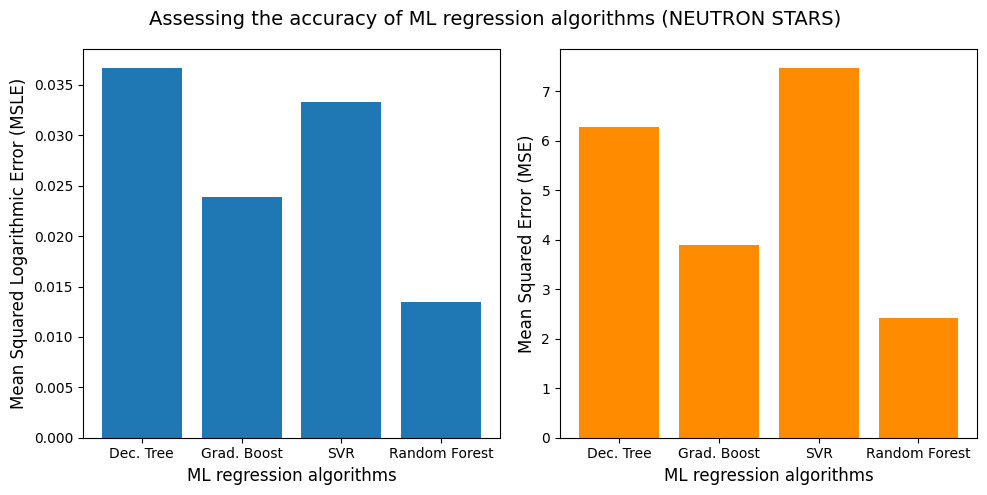

In [39]:
# Metrics results for Neutron Stars (polytropic)
fig_metrics_NS_avg,axes_metrics_NS_avg = plt.subplots(1,2,figsize=(10,5))
ML_reg_algorithms_names = ["Dec. Tree","Grad. Boost","SVR","Random Forest"]

# Summarizing the MSLE and MSE results in lists
MSLE_avg_results_NS = [MSLE_dtree_NS_avg,MSLE_gradboost_NS_avg,MSLE_SVR_NS_avg,MSLE_RF_NS_avg]
MSE_avg_results_NS = [MSE_dtree_NS_avg,MSE_gradboost_NS_avg,MSE_SVR_NS_avg,MSE_RF_NS_avg]

# Plotting the MSLE (uniform average results)
axes_metrics_NS_avg[0].bar(ML_reg_algorithms_names,MSLE_avg_results_NS)
axes_metrics_NS_avg[0].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_NS_avg[0].set_ylabel("Mean Squared Logarithmic Error (MSLE)",fontsize=12)

# Plotting the MSE (uniform average results)
axes_metrics_NS_avg[1].bar(ML_reg_algorithms_names,MSE_avg_results_NS,color="darkorange")
axes_metrics_NS_avg[1].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_NS_avg[1].set_ylabel("Mean Squared Error (MSE)",fontsize=12)

fig_metrics_NS_avg.suptitle("Assessing the accuracy of ML regression algorithms (NEUTRON STARS)",fontsize=14)
fig_metrics_NS_avg.tight_layout()

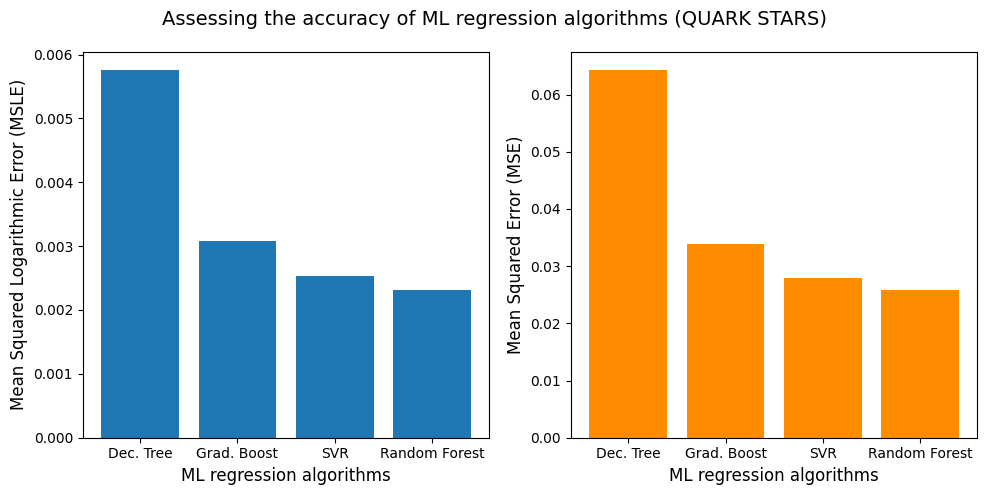

In [40]:
# Metrics results for Quark Stars (cfl)
fig_metrics_QS_avg,axes_metrics_QS_avg = plt.subplots(1,2,figsize=(10,5))
ML_reg_algorithms_names = ["Dec. Tree","Grad. Boost","SVR","Random Forest"]

# Summarizing the MSLE and MSE results in lists
MSLE_avg_results_QS = [MSLE_dtree_QS_avg,MSLE_gradboost_QS_avg,MSLE_SVR_QS_avg,MSLE_RF_QS_avg]
MSE_avg_results_QS = [MSE_dtree_QS_avg,MSE_gradboost_QS_avg,MSE_SVR_QS_avg,MSE_RF_QS_avg]

# Plotting the MSLE (uniform average results)
axes_metrics_QS_avg[0].bar(ML_reg_algorithms_names,MSLE_avg_results_QS)
axes_metrics_QS_avg[0].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_QS_avg[0].set_ylabel("Mean Squared Logarithmic Error (MSLE)",fontsize=12)

# Plotting the MSE (uniform average results)
axes_metrics_QS_avg[1].bar(ML_reg_algorithms_names,MSE_avg_results_QS,color="darkorange")
axes_metrics_QS_avg[1].set_xlabel("ML regression algorithms",fontsize=12)
axes_metrics_QS_avg[1].set_ylabel("Mean Squared Error (MSE)",fontsize=12)

fig_metrics_QS_avg.suptitle("Assessing the accuracy of ML regression algorithms (QUARK STARS)",fontsize=14)
fig_metrics_QS_avg.tight_layout()

### **3.3 Plotting true and prediceted values**

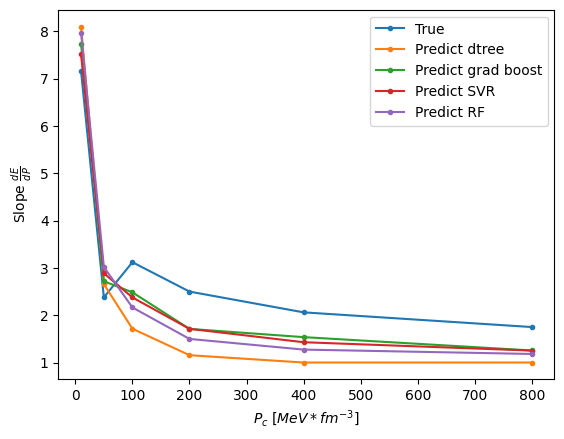

In [53]:
plt.plot([10,50,100,200,400,800],NS_EOS_regY_test.iloc[1500],".-",label="True")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_dtree[1500],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_gradboost[1500],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_SVR[1500],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],NS_EOS_regY_predict_RF[1500],".-",label="Predict RF")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()

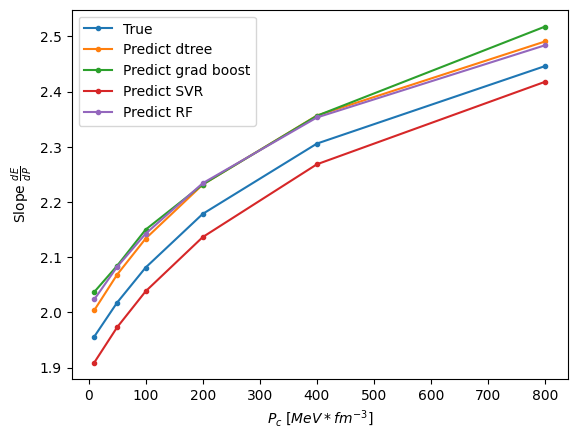

In [56]:
plt.plot([10,50,100,200,400,800],QS_EOS_regY_test.iloc[2111],".-",label="True")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_dtree[2111],".-",label="Predict dtree")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_gradboost[2111],".-",label="Predict grad boost")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_SVR[2111],".-",label="Predict SVR")
plt.plot([10,50,100,200,400,800],QS_EOS_regY_predict_RF[2111],".-",label="Predict RF")
plt.xlabel(r"$P_c$ $[MeV*fm^{-3}]$")
plt.ylabel(r"Slope $\frac{dE}{dP}$")
plt.legend()